In [1]:
from mpl_toolkits.mplot3d import Axes3D
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  NumExpr defaulting to 3 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.b = NArray(label=':math:`b`', dtype=float64, default=array([3.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindma

# Display ROIs & M/EEG sensor positions

*Candidate for new tutorial on visualizing all elements of the data set*

To be sure of the accuracy of forward solution for M/EEG, it is important to verify the geometry of the sources and sensors, as well as the boundaries. Here, we plot these elements of the forward solution for TVB's default dataset.

First, we load the data

In [2]:
sens_meg = sensors.SensorsMEG.from_file()
conn = connectivity.Connectivity.from_file()
skin = surfaces.SkinAir.from_file()
skin.configure()
sens_eeg = sensors.SensorsEEG.from_file()
sens_eeg.configure()

WARNING  File 'hemispheres' not found in ZIP.


then, plot the different elements

<IPython.core.display.Javascript object>


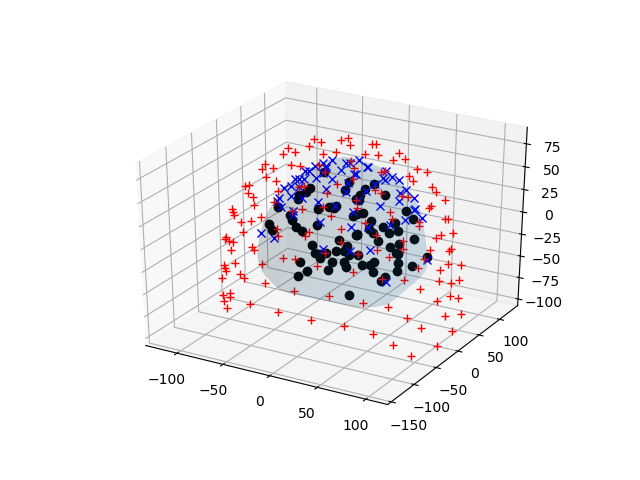

In [3]:
figure()
ax = subplot(111, projection='3d')

# ROI centers as black circles
x, y, z = conn.centres.T
ax.plot(x, y, z, 'ko')

# EEG sensors as blue x's
x, y, z = sens_eeg.sensors_to_surface(skin).T
ax.plot(x, y, z, 'bx')

# Plot boundary surface
x, y, z = skin.vertices.T
ax.plot_trisurf(x, y, z, triangles=skin.triangles, alpha=0.1, edgecolor='none')

# MEG sensors as red +'s
x, y, z = sens_meg.locations.T
ax.plot(x, y, z, 'r+')

_More visualizations to come:_

* volume data -> MRI acquisition -> Registration -> Coordinates transform to MNI space 
 |
  \-- voxel-based gray matter parcellation (obtain parcellation mask) -> AAL/anatomical template
 
* surfaces data (cortical, skull, skin surfaces extraction) -> FSL/BET 

* connectivity data (white matter weights, tract-lengths)   -> Diffusion Toolkit + TrackVis

* region mapping between parcellation and number of vertices in the cortical surface.

+ lead-field matrices (ie, projection matrices) mapping nodes onto EEG/MEG space